In [17]:
import scanpy as sc

In [18]:
adata_inj=sc.read("adata_processed.h5ad")
adata_unj=sc.read("adata_processed_mes.h5ad")

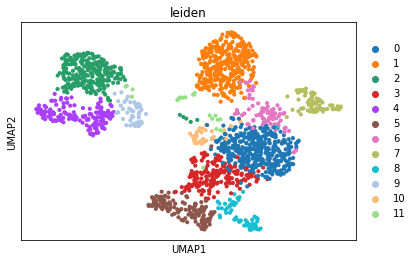

In [19]:
sc.pl.umap(adata,color="leiden")
adata_glia=adata_inj[adata_inj.obs.leiden.isin(["2","4","9"])]

In [33]:
adata_glia=adata_glia.raw.to_adata()

In [36]:
adata_unj=adata_unj.raw.to_adata()

In [37]:
adata=anndata.concat([adata_glia,adata_unj],join="outer",fill_value=0)

In [40]:
sc.pp.filter_genes(adata,min_cells=3)

In [42]:
import scFates as scf

Finding overdispersed features
    computing mean and variances
    gam fitting
    found 155 over-dispersed features (0:00:00) --> added 
    .var['res'], residuals of GAM fit.
    .var['lp'], p-value.
    .var['lpa'], BH adjusted p-value.
    .var['qv'], percentile of qui-squared distribution.
    .var['highly_variable'], feature is over-dispersed.



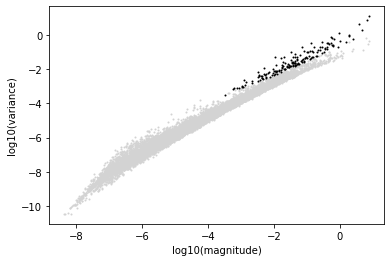

In [43]:
scf.pp.find_overdispersed(adata,plot=True)

In [44]:
adata.raw=adata

In [45]:
sc.pp.scale(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata,n_pcs=20)
sc.tl.leiden(adata,resolution=.5)
sc.tl.umap(adata)

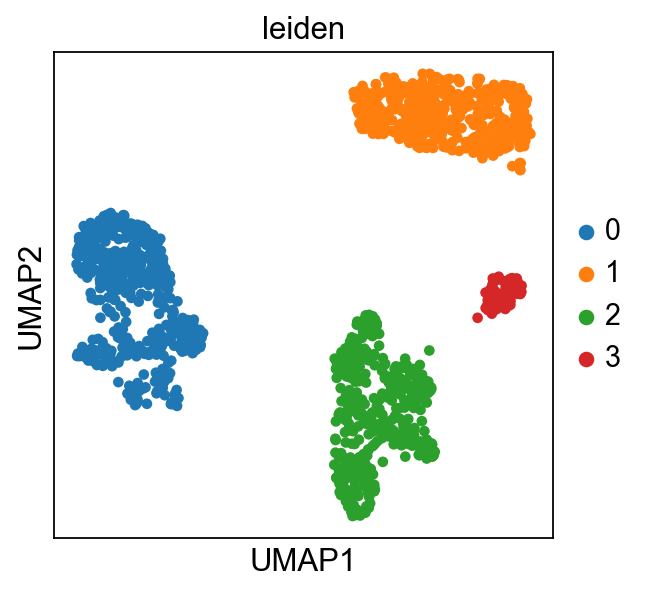

In [52]:
sc.set_figure_params()
sc.tl.leiden(adata,resolution=.1)
sc.pl.umap(adata,color="leiden")

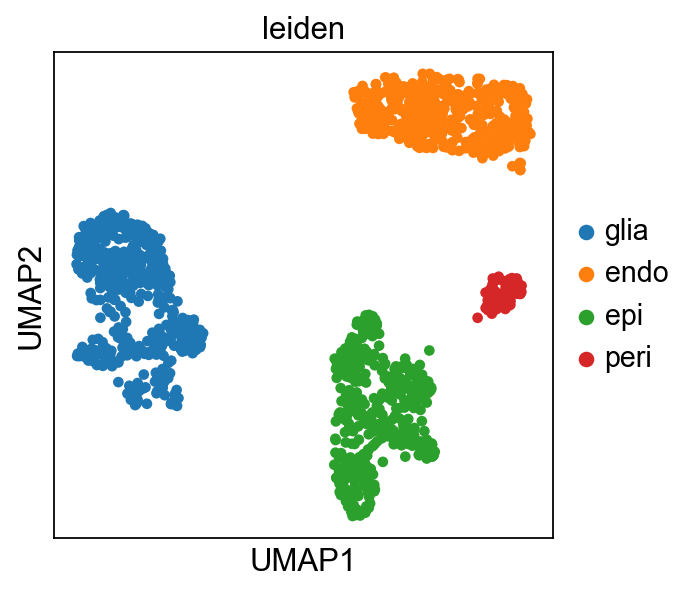

In [54]:
adata.obs.leiden=adata.obs.leiden.cat.rename_categories(["glia","endo","epi","peri"])
sc.pl.umap(adata,color="leiden")

In [56]:
adata.write("adata_combined.h5ad")

In [57]:
adata.obs

,leiden
AAACATTCTCGA,glia
ATTAGTAGCAGA,glia
ATATTTGGTGAT,glia
TGTTACGTGTCT,glia
GGCCTGCCTTCC,glia
...,...
TCGCACTGGCGC,epi
GCCGTAACTTGA,epi
CATAGGTCCTGT,epi
CGGTTCTAGAGT,epi
